In [2]:
import os
from os import listdir
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/Users/lancy/Desktop/Topics-Extraction-Hotel-Reviews/hotel state/hotel_reviewVA.txt', sep="\n", header=None)
df.columns = ["reviews"]
df.head()

,reviews
0,"This hotel was nice and quiet. Did not know, t..."
1,We stayed in the king suite with the separatio...
2,"Parking was horrible, somebody ran into my ren..."
3,Not cheap but excellent location. Price is som...
4,If you get the room that they advertised on th...


In [3]:
from wordcloud import WordCloud

def wc(df,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(df))
    plt.imshow(wc)
    plt.axis('off')

In [4]:
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
polarity=[]
for i in df['reviews']:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        
    except:
        polarity.append(0)


In [5]:
df['polarity']=polarity

In [6]:
#positive comments
pos_com= df[['reviews','polarity']][df.polarity>0]
pos_com.head()

,reviews,polarity
0,"This hotel was nice and quiet. Did not know, t...",0.187500
1,We stayed in the king suite with the separatio...,0.399524
3,Not cheap but excellent location. Price is som...,0.495238
4,If you get the room that they advertised on th...,0.214286
5,"This is such a fun, lovely hotel. The attentio...",0.198077


In [7]:
pos_com.count()

reviews     110
polarity    110
dtype: int64

In [8]:
#negative comments
neg_com = df[['reviews','polarity']][df.polarity<0]
neg_com.head()

,reviews,polarity
2,"Parking was horrible, somebody ran into my ren...",-0.350000
7,"I reserved a room a week in advance, knowing a...",-0.400000
9,"Hello, I have traveled a lot and abroad and by...",-0.342857
15,"This Hotel, formerly a prestigious bank, may b...",-0.041127
94,accused of smoking in my room. only young blac...,-0.150852


In [9]:
neg_com.count()

reviews     6
polarity    6
dtype: int64

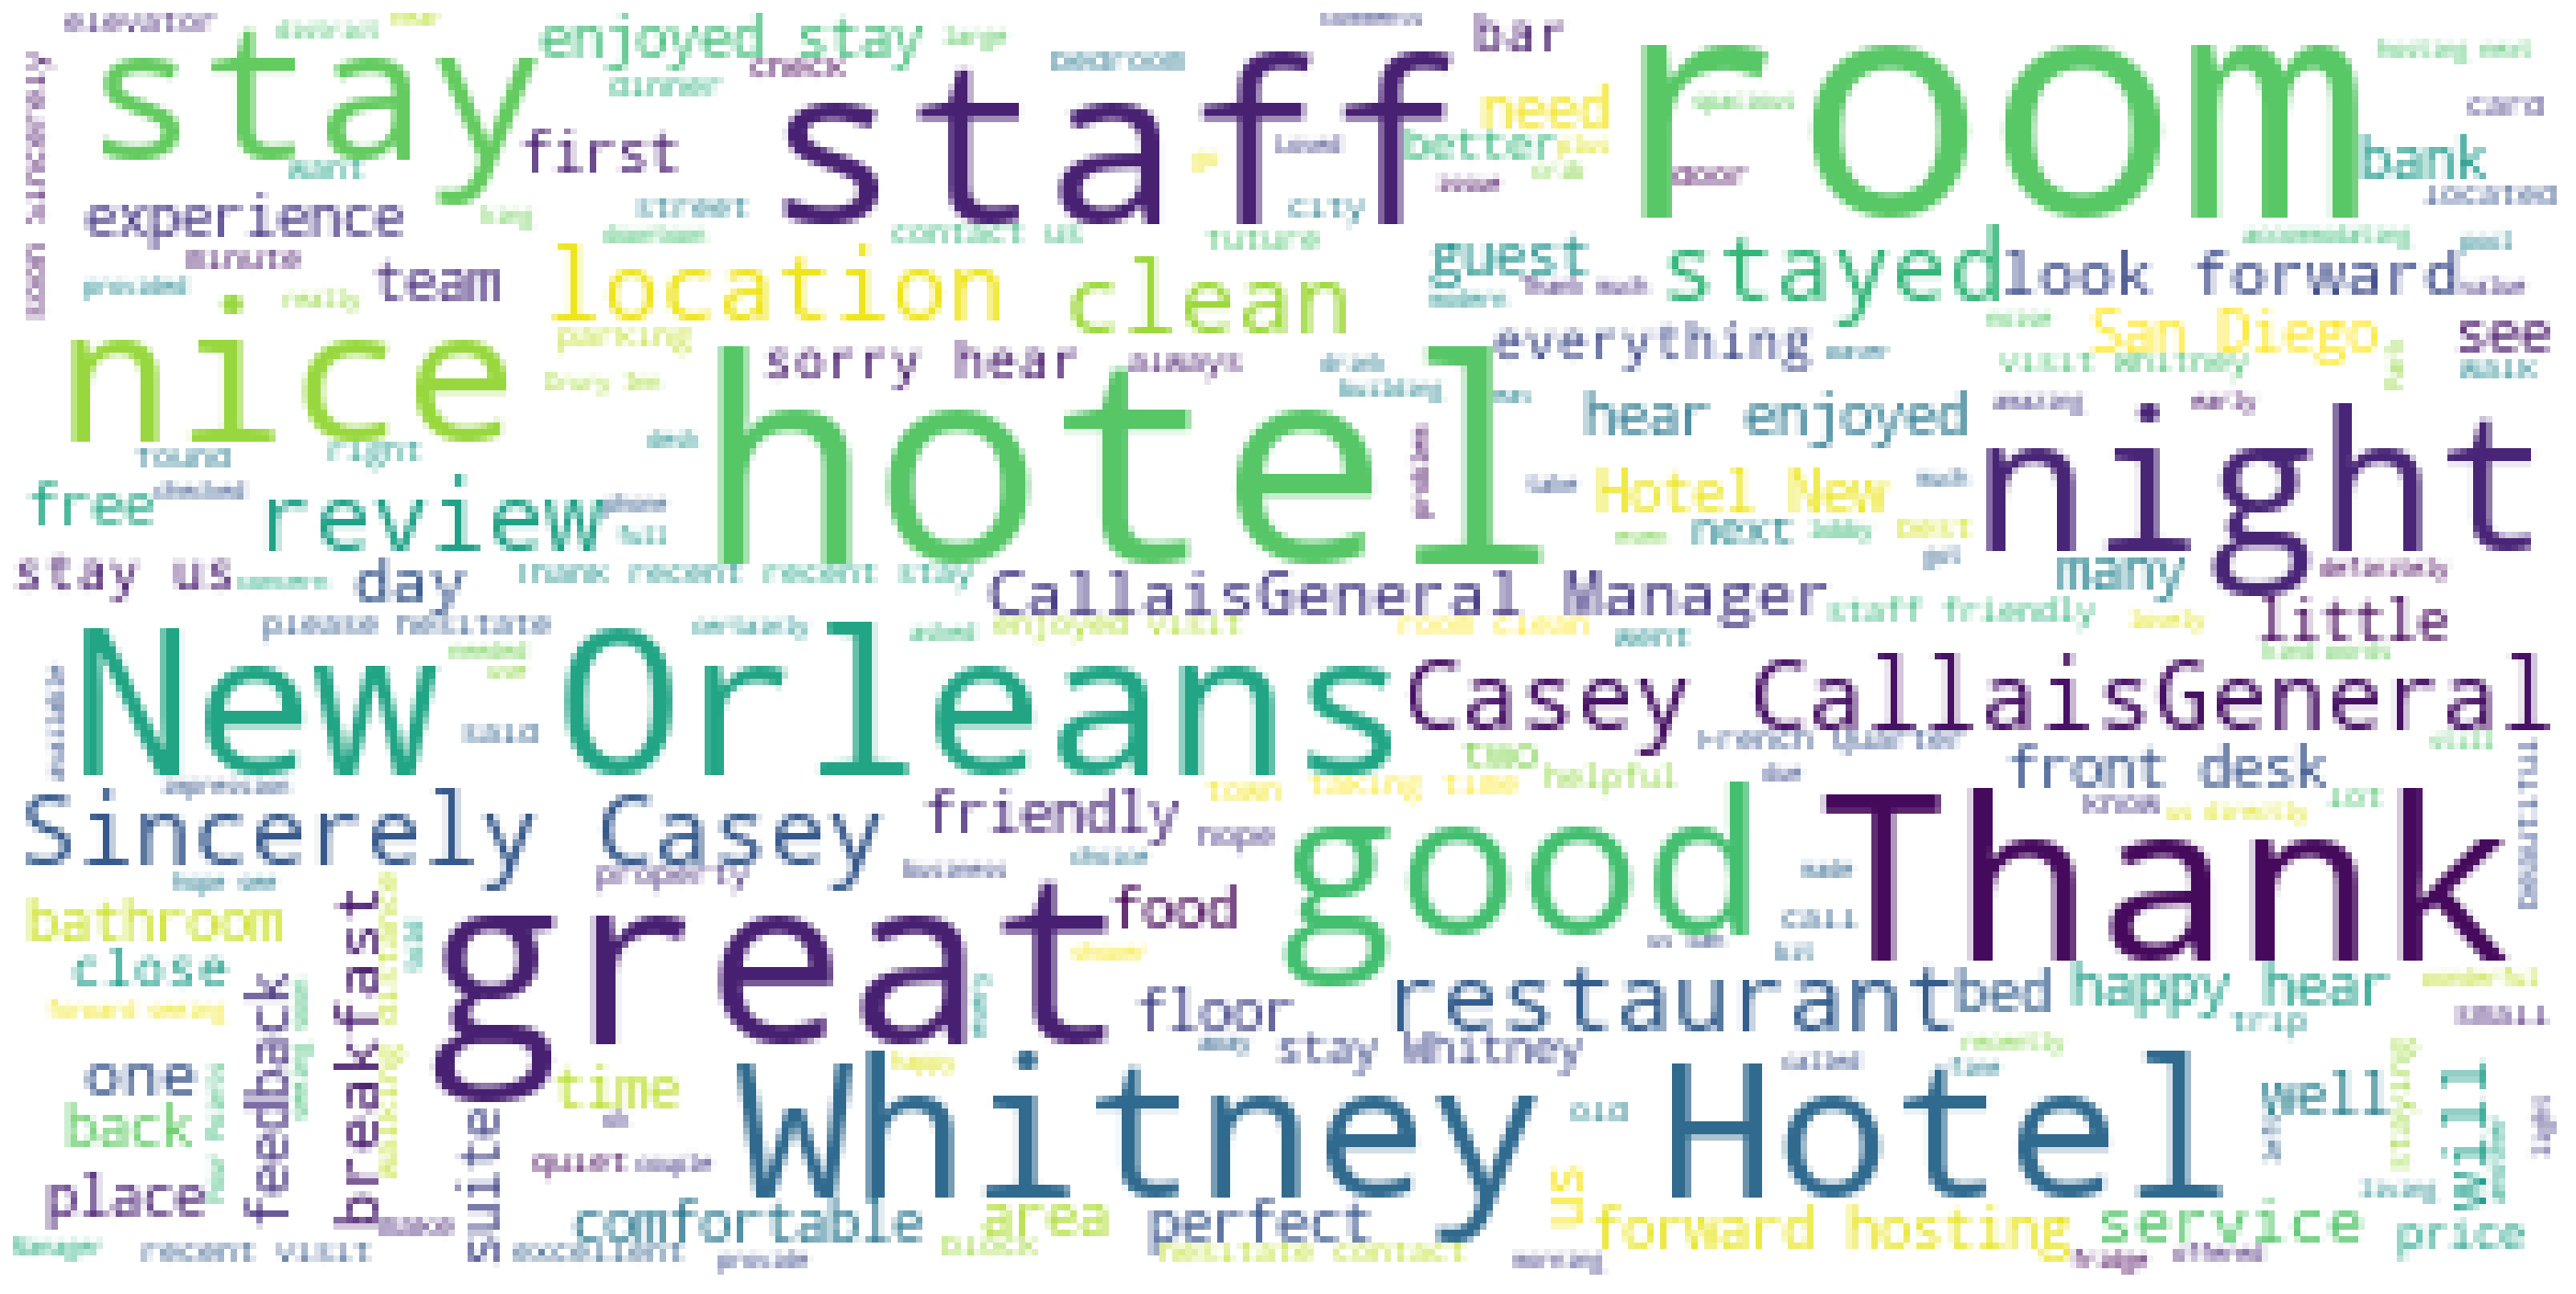

In [10]:
#highly positive reviews
wc(df['reviews'][df.polarity>0],'white','Common Words' )

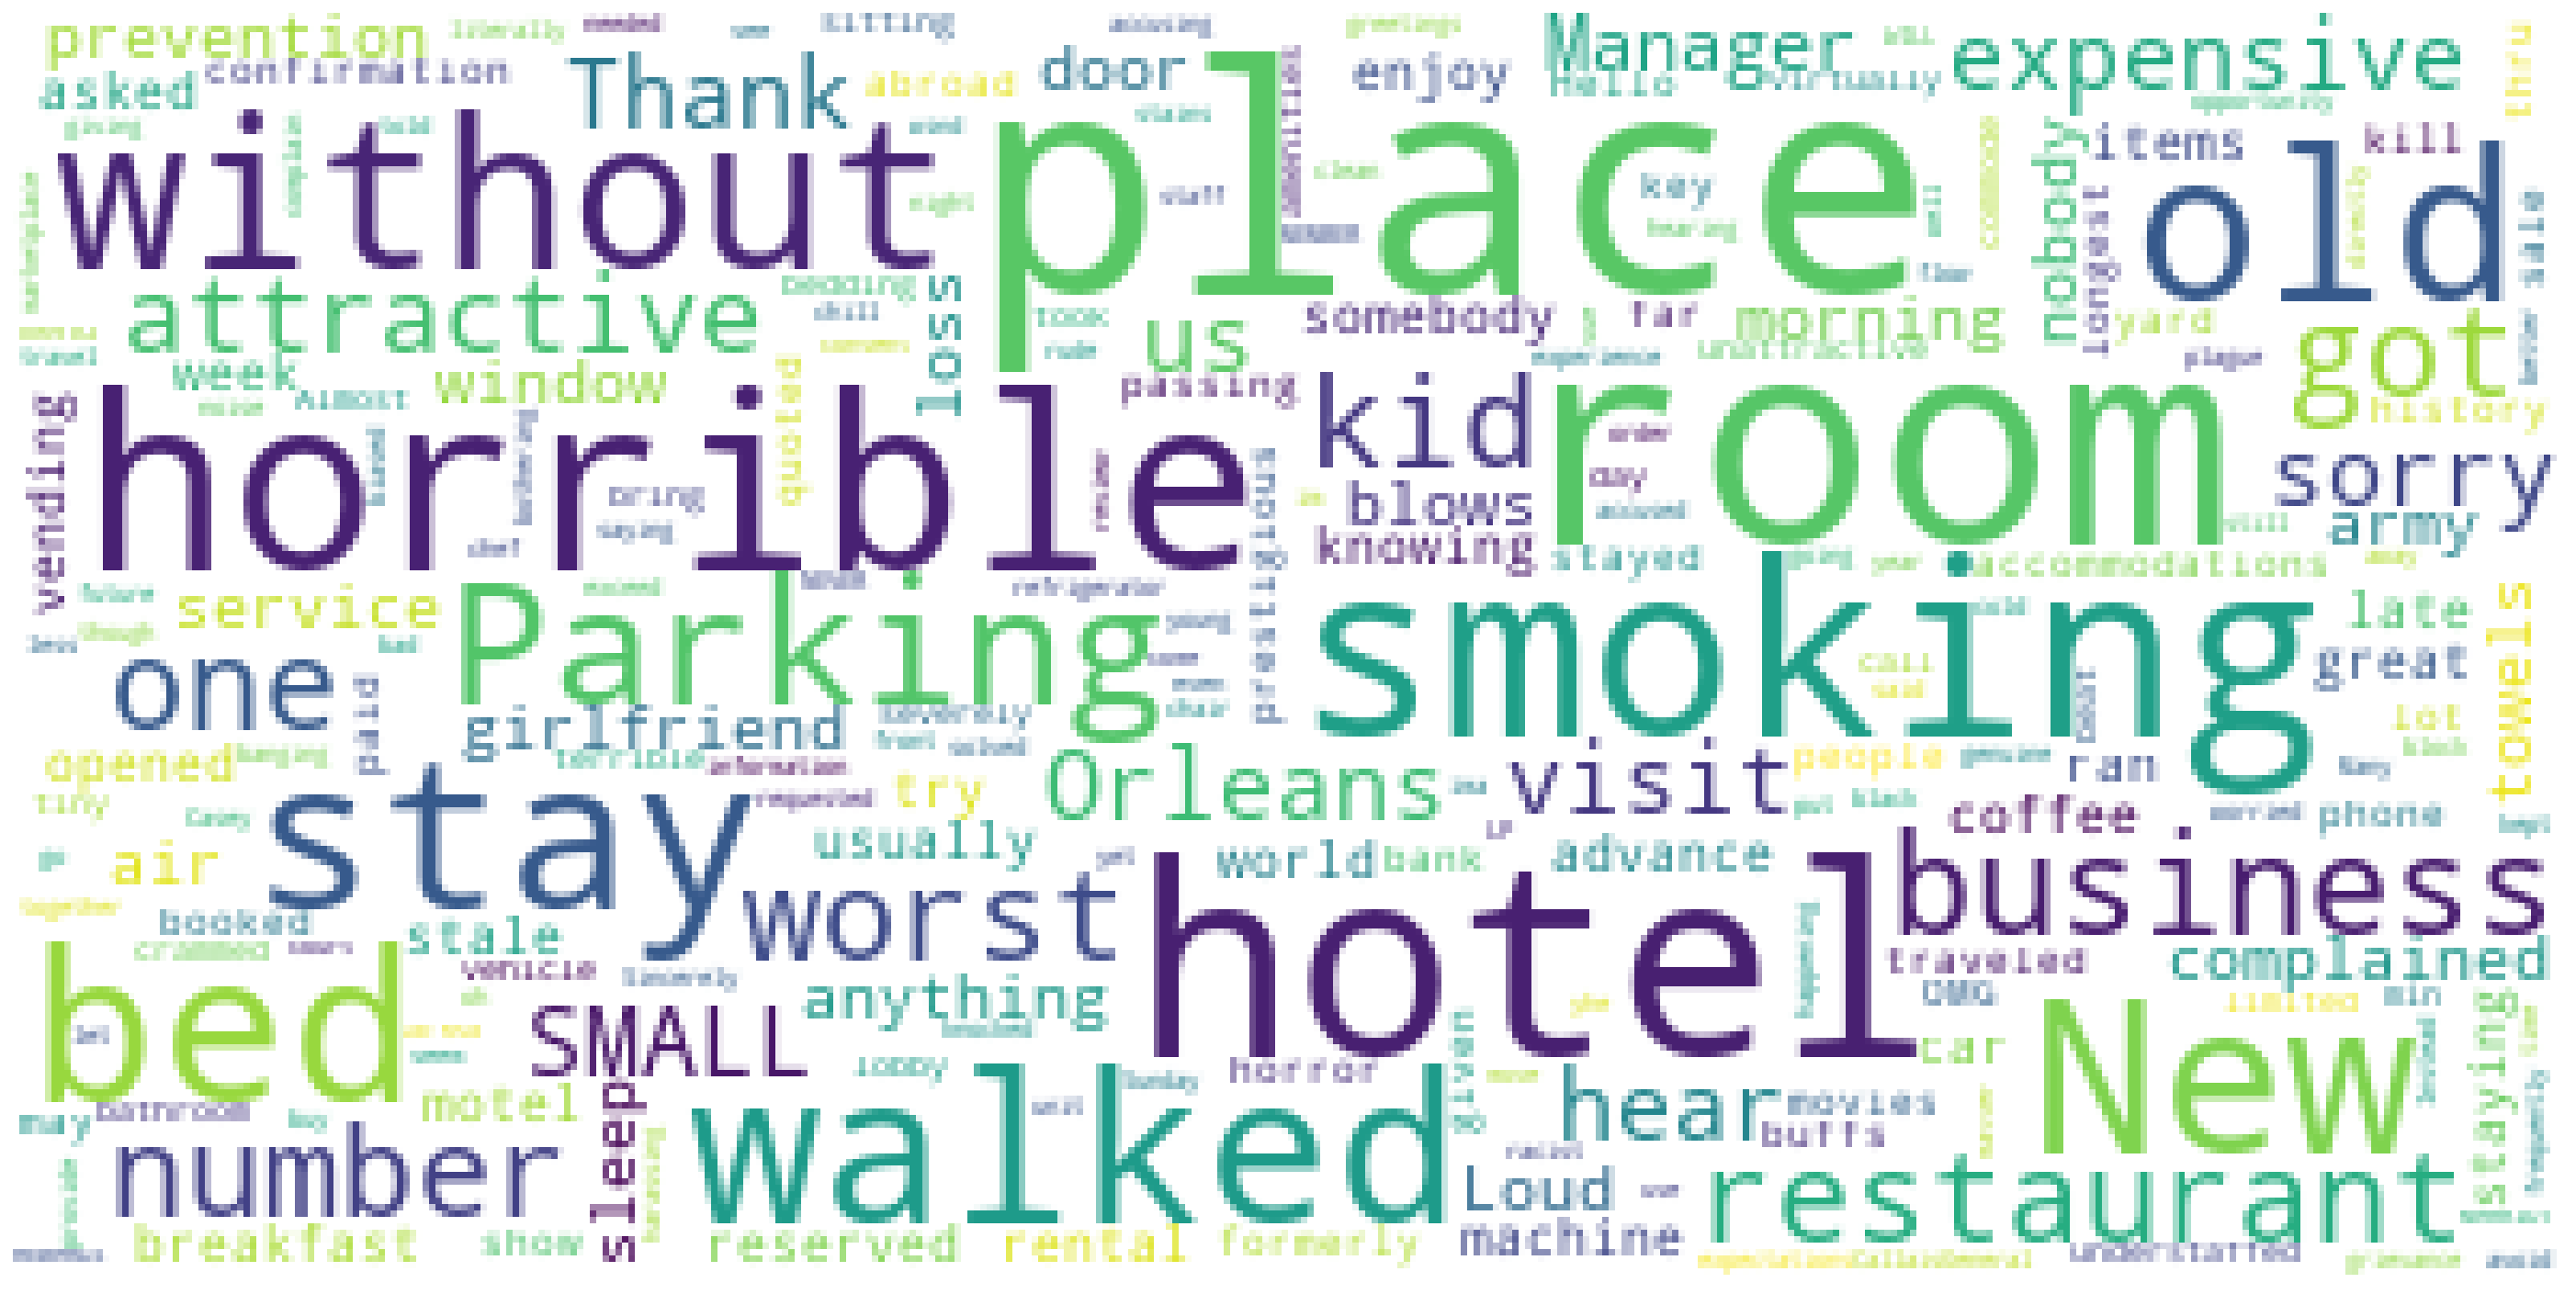

In [11]:
#highly negative reviews
wc(df['reviews'][df.polarity<0],'white','Common Words' )

In [12]:
df['polarity'][df.polarity > 0]= 1
df['polarity'][df.polarity < 0]= -1

 1.0    110
-1.0      6
 0.0      2
Name: polarity, dtype: int64

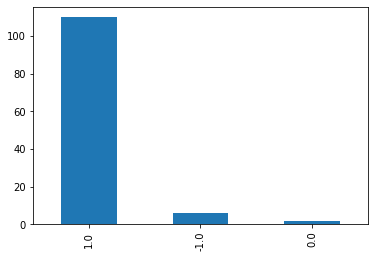

In [13]:
df.polarity.value_counts().plot.bar()
df.polarity.value_counts()